In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
path_Data = "C:\\vsCode\\git\\VTC_PYTHON_04\\Data\\CrossandUpSellingProblem\\"
os.chdir(path_Data) 

In [3]:
grocery_items = set()
with open("grocery_dataset.txt") as f: # f with open sẽ chỉ dòng đầu tiên , cursor pointer con  trỏ, dựa vào f để đọc từng dòng trong file
    reader = csv.reader(f, delimiter=",") # csv.reader
    for i, item in enumerate(reader):
        grocery_items.update(item)

In [4]:
list(grocery_items)[:10]

['ham',
 'pet care',
 'brown bread',
 'condensed milk',
 'frozen vegetables',
 'baking powder',
 'liquor (appetizer)',
 'potato products',
 'soap',
 'decalcifier']

In [5]:
output_list = list()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, items in enumerate(reader):
        row_val = {item:0 for item in grocery_items} # Tạo danh sách sản phẩm
        row_val.update({item:1 for item in items}) # Tạo list các sản phảm tích vào
        output_list.append(row_val)

In [6]:
print(len(output_list), len(output_list[0]))
print(output_list[:5])


9835 169
[{'ham': 0, 'pet care': 0, 'brown bread': 0, 'condensed milk': 0, 'frozen vegetables': 0, 'baking powder': 0, 'liquor (appetizer)': 0, 'potato products': 0, 'soap': 0, 'decalcifier': 0, 'rolls/buns': 0, 'dessert': 0, 'cooking chocolate': 0, 'sound storage medium': 0, 'toilet cleaner': 0, 'male cosmetics': 0, 'frozen chicken': 0, 'candy': 0, 'preservation products': 0, 'dishes': 0, 'snack products': 0, 'canned fruit': 0, 'chocolate marshmallow': 0, 'popcorn': 0, 'fruit/vegetable juice': 0, 'whisky': 0, 'curd cheese': 0, 'rice': 0, 'organic products': 0, 'baby cosmetics': 0, 'oil': 0, 'shopping bags': 0, 'hamburger meat': 0, 'specialty cheese': 0, 'herbs': 0, 'bags': 0, 'pastry': 0, 'frozen meals': 0, 'photo/film': 0, 'artif. sweetener': 0, 'bathroom cleaner': 0, 'liver loaf': 0, 'citrus fruit': 1, 'tropical fruit': 0, 'brandy': 0, 'whipped/sour cream': 0, 'napkins': 0, 'cream': 0, 'detergent': 0, 'female sanitary products': 0, 'tea': 0, 'turkey': 0, 'butter': 0, 'cleaner': 0, '

In [7]:
grocery_df = pd.DataFrame(output_list)

In [8]:
print(grocery_df.shape)
display(grocery_df.head())

(9835, 169)


,ham,pet care,brown bread,condensed milk,frozen vegetables,baking powder,liquor (appetizer),potato products,soap,decalcifier,...,beverages,grapes,liqueur,butter milk,red/blush wine,sparkling wine,canned beer,candles,domestic eggs,cocoa drinks
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# View top sold items
total_item_count = sum(grocery_df.sum()) # Tổng của tổng số lần mua
print(total_item_count)
item_summary_df = grocery_df.sum().sort_values(ascending = False).reset_index().head(n=20)
item_summary_df.rename(columns={item_summary_df.columns[0]:'item_name',item_summary_df.columns[1]:'item_count'}, inplace=True)
item_summary_df.head()

43367


,item_name,item_count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372


Text(0.5, 1.0, 'Item sales distribution')

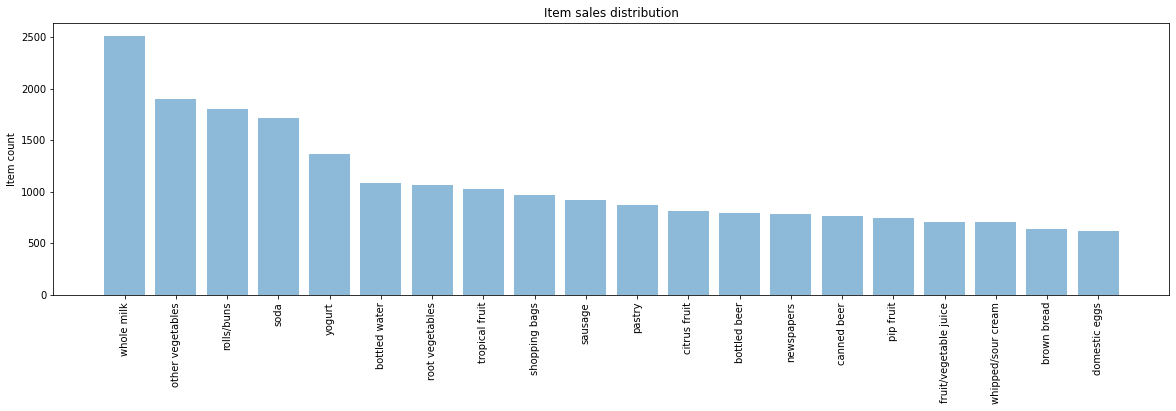

In [10]:
# Visualize top sold items
objects = (list(item_summary_df['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary_df['item_count'].head(n=20))

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

In [11]:
# Analyze items contributing to top sales
item_summary_df['item_perc'] = item_summary_df['item_count']/total_item_count
item_summary_df['total_perc'] = item_summary_df.item_perc.cumsum() # Cộng dồn
item_summary_df.head(10)

,item_name,item_count,item_perc,total_perc
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725
5,bottled water,1087,0.025065,0.239791
6,root vegetables,1072,0.024719,0.264510
7,tropical fruit,1032,0.023797,0.288307
8,shopping bags,969,0.022344,0.310651
9,sausage,924,0.021307,0.331957


In [12]:
# Analyze items contributing to top 50% of sales
item_summary_df[item_summary_df.total_perc <= 0.5].shape # Trar về giá trị True False rồi xóa nhưng SP lớn hơn 0.5

(19, 4)

In [13]:
item_summary_df[item_summary_df.total_perc <= 0.5]

,item_name,item_count,item_perc,total_perc
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725
5,bottled water,1087,0.025065,0.239791
6,root vegetables,1072,0.024719,0.264510
7,tropical fruit,1032,0.023797,0.288307
8,shopping bags,969,0.022344,0.310651
9,sausage,924,0.021307,0.331957


In [17]:
# Prune Dataset for frequently purchased items
input_df=grocery_df.copy()
length_trans=2 # Nếu khách hàng nào mua 1 sản phẩm đóng góp vào 40 % doanh thu
total_sales_perc=0.4

item_count = input_df.sum().sort_values(ascending = False).reset_index()
total_items = sum(input_df.sum().sort_values(ascending = False))
item_count.rename(columns={item_count.columns[0]:'item_name',item_count.columns[1]:'item_count'}, inplace=True)
item_count['item_perc'] = item_count['item_count']/total_items
item_count['total_perc'] = item_count.item_perc.cumsum()

In [19]:
total_sales_perc=0.4
selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
input_df['total_items'] = input_df[selected_items].sum(axis = 1) # sum (axis = 1 ) tính tổng theo hàng ngang
input_df = input_df[input_df.total_items >= length_trans] # Nếu khách hàng nào mua 1 sản phẩm đóng góp vào 40 % doanh thu bỏ, tính khách hàng mua từ 2 SPN

In [27]:
output_df = input_df[selected_items +["total_items"]]
item_counts = item_count[item_count.total_perc < total_sales_perc]
output_df = output_df.sort_values(by = "total_items", ascending= False)

In [33]:
display(output_df.head())
print(list(output_df.columns))
print(item_counts)


,whole milk,other vegetables,rolls/buns,soda,yogurt,bottled water,root vegetables,tropical fruit,shopping bags,sausage,pastry,citrus fruit,bottled beer,total_items
3389,1,1,1,1,1,1,1,1,1,0,1,0,0,10
861,1,1,1,0,1,1,1,1,1,0,0,0,1,9
258,1,1,1,1,1,1,0,1,0,1,0,1,0,9
6289,1,1,1,1,1,1,0,1,0,1,0,0,1,9
7473,1,1,1,0,1,1,1,0,1,1,1,0,0,9


['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer', 'total_items']
           item_name  item_count  item_perc  total_perc
0         whole milk        2513   0.057947    0.057947
1   other vegetables        1903   0.043881    0.101829
2         rolls/buns        1809   0.041714    0.143542
3               soda        1715   0.039546    0.183089
4             yogurt        1372   0.031637    0.214725
5      bottled water        1087   0.025065    0.239791
6    root vegetables        1072   0.024719    0.264510
7     tropical fruit        1032   0.023797    0.288307
8      shopping bags         969   0.022344    0.310651
9            sausage         924   0.021307    0.331957
10            pastry         875   0.020177    0.352134
11      citrus fruit         814   0.018770    0.370904
12      bottled beer         792   0.018263    0.389167


In [32]:
item_check = "whole milk"
check_df = output_df[output_df[item_check] == 1]
check_df.head(10)

KeyError: False